In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
data = pd.read_csv('data/transformed_data.csv', index_col=0)

# General overview
## Number of instances vs time (of the year)

In [4]:
#number of instances over the years
data.year.value_counts().sort_index()

2013     2662
2014    10890
2015    10719
2016     1341
Name: year, dtype: int64

### Number of observations over time per year

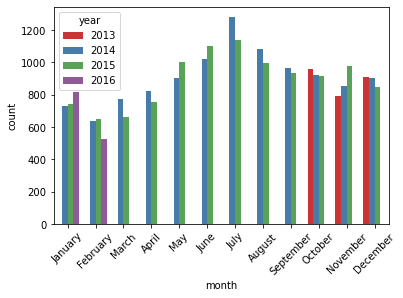

In [5]:
data['month'] = pd.Categorical(
    data['month'],
    categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
                'November', 'December'],
    ordered=True
)
data.sort_values('month')
chart=sns.countplot(data=data, x="month", hue="year", palette="Set1")
chart = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


### Number of observations over time averaged per month

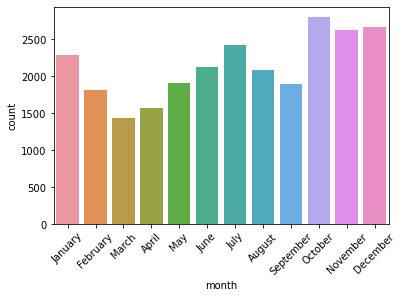

In [6]:
chart = sns.countplot(data=data, x="month")
chart = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

### Number of observations over time per weekday

<AxesSubplot:xlabel='weekday', ylabel='count'>

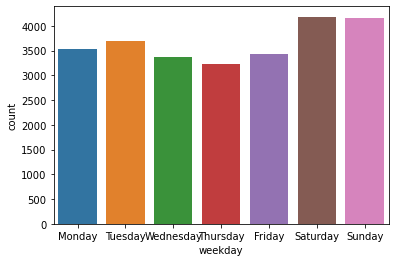

In [7]:
data['weekday'] = pd.Categorical(
    data['weekday'],
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True
)
data.sort_values('weekday')
data = data.sort_values(by="weekday")

sns.countplot(data=data, x="weekday")

## Number of Dogs and Cats

<AxesSubplot:xlabel='AnimalType', ylabel='count'>

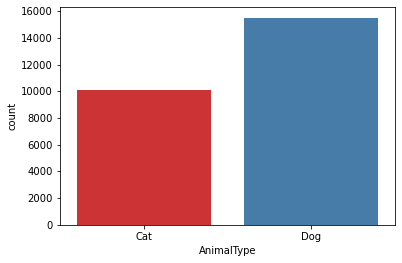

In [8]:
sns.countplot(data=data, x="AnimalType", palette='Set1')

## Rates of different outcomes (also over time)

In [9]:
#counts of the different outcomes
data.OutcomeType.value_counts().sort_index()

Adoption           10769
Died                 171
Euthanasia          1452
Return_to_owner     4773
Transfer            8447
Name: OutcomeType, dtype: int64

Now we will see how the share of different outcomes change with the month of the year

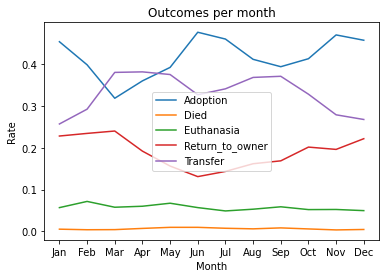

In [10]:
share_of_outcomes = np.zeros((12, 5))
outcomes = data.OutcomeType.unique()
outcomes.sort()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
                'November', 'December']
for m in range(len(months)):
    share_of_outcomes[m - 1] = data[data.month == months[m]].OutcomeType.value_counts().sort_index()
    share_of_outcomes[m - 1] = share_of_outcomes[m - 1] / np.sum(share_of_outcomes[m - 1])

share_of_outcomes = share_of_outcomes.T

plt.title('Outcomes per month')
for i in range(5):
    plt.plot(share_of_outcomes[i], label=outcomes[i])
plt.legend()
plt.xlabel("Month")
plt.ylabel("Rate")
plt.xticks(range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

And the same over multiple years:

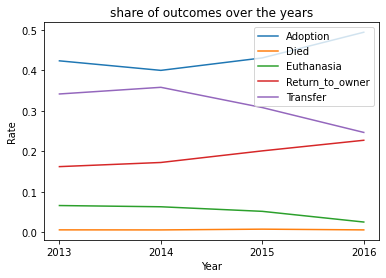

In [11]:
#now the same over the years
share_of_outcomes = np.zeros((4, 5))
outcomes = data.OutcomeType.unique()
outcomes.sort()

for y in [2013, 2014, 2015, 2016]:
    share_of_outcomes[y - 2013] = data[data.year == y].OutcomeType.value_counts().sort_index()
    share_of_outcomes[y - 2013] = share_of_outcomes[y - 2013] / np.sum(share_of_outcomes[y - 2013])

share_of_outcomes = share_of_outcomes.T

plt.title('share of outcomes over the years')
for i in range(5):
    plt.plot(share_of_outcomes[i], label=outcomes[i])
plt.legend()
plt.xlabel("Year")
plt.ylabel("Rate")
plt.xticks(range(0, 4), labels=['2013', '2014', '2015', '2016'])
plt.show()

Here we have a kind of nice insight that the rates of adoption and return to owner increase over the years, but the rate of transfer decreases over the years.

## Age distribution

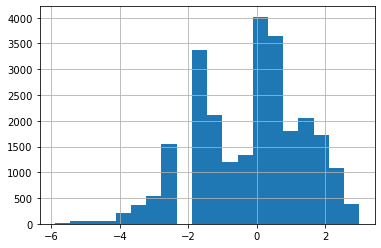

In [12]:
# sns.distplot(data.AgeuponOutcome, bins = 20, kde=False)
# TODO @Lukas what to the negative values mean?
data[data.AgeuponOutcome != 0].AgeuponOutcome.apply(np.log).hist(bins=20)
plt.show()

## Outcomes vs. sex and neutralization

<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

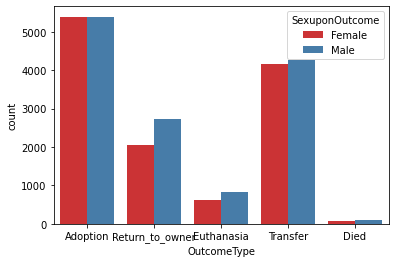

In [13]:
#plot outcomes in relation to the sex
sns.countplot(data=data, x="OutcomeType", hue="SexuponOutcome", palette='Set1')

# for s in ['Male','Female']:
#     data_ = data[data.SexuponOutcome == s]
#     l = len(data_)
#     v = data_.OutcomeType.value_counts().sort_index().apply(lambda x: x/l)
#     v.plot(label = s)
# plt.title('rates of outcomes by sex')
# plt.legend()
# plt.show()

seems like there are only minor differences

<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

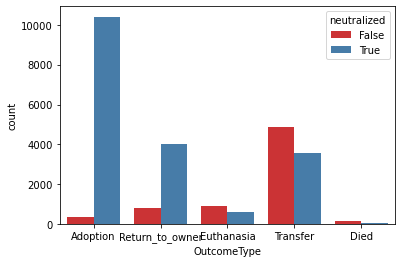

In [14]:
#plot outcomes in relation to neutralization
sns.countplot(data=data, x="OutcomeType", hue="neutralized", palette='Set1')

# for s in [True,False]:
#     data_ = data[data.neutralized == s]
#     l = len(data_)
#     v = data_.OutcomeType.value_counts().sort_index().apply(lambda x: x/l)
#     v.plot(label = s)
# plt.title('rates of outcomes by neutralization')
# plt.legend()
# plt.show()

Now thats interesting!

## Outcomes for dog vs. cat

<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

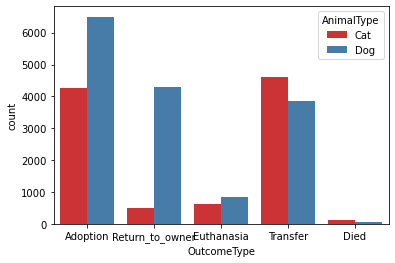

In [15]:
#plot outcomes in relation to the kind of animal
sns.countplot(data=data, x='OutcomeType', hue='AnimalType', palette="Set1")

# for s in ['Dog','Cat']:
#     data_ = data[data.AnimalType == s]
#     l = len(data_)
#     v = data_.OutcomeType.value_counts().sort_index().apply(lambda x: x/l)
#     v.plot(label = s)
# plt.title('rates of outcomes by kind of animal')
# plt.legend()
# plt.show()

This also seems interesting!

## Outcome by maturity
We consider an animal to be an adult if its older than 1 year and check if this has an influence on its outcome.

<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

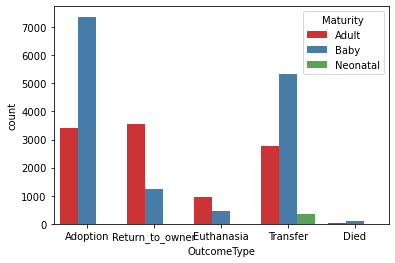

In [16]:
def extractMaturity(age):
    if age <= 0.019231:
        return "Neonatal"
    elif age <= 1:
        return "Baby"
    else:
        return "Adult"


data['Maturity'] = data.AgeuponOutcome.apply(extractMaturity)  #apply the function
sns.countplot(data=data, x="OutcomeType", hue="Maturity", palette='Set1')

Unsurprisingly younger animals get adopted more often. Also, some very young animals, which should not get separated from its mother yet (https://www.hospitalveterinariglories.com/puppy-with-its-mother/?lang=en ), are transferred.

## Outcome by age timeline

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Proportion'),
 Text(0.5, 1.0, 'Outcome by Age')]

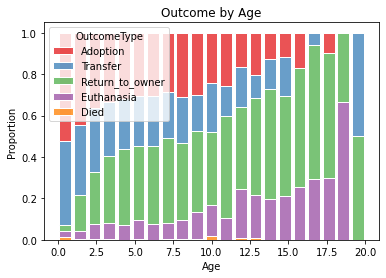

In [17]:
plot_data = data.copy()
plot_data["AgeuponOutcome"] = plot_data["AgeuponOutcome"].round(decimals=0)
x, y, hue = "AgeuponOutcome", "proportion", "OutcomeType"

plot_data = plot_data[hue].groupby(plot_data[x]).value_counts(normalize=True).rename(y).reset_index()

ax = sns.histplot(
    plot_data,
    x=x,
    weights=y,
    hue=hue,
    multiple='stack',
    palette="Set1",
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8,
    bins=21
)

#specfiy axis labels
ax.set(xlabel='Age',
       ylabel='Proportion',
       title='Outcome by Age')


Text(0.5, 0.98, 'Outcome by Age')

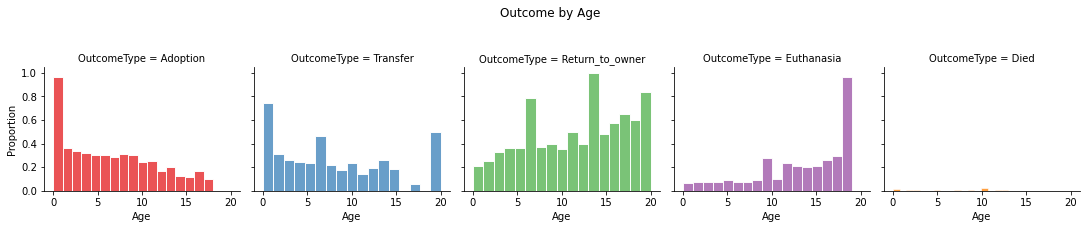

In [18]:
# Alternative plot for the stacked bar chart
hist_wrap = sns.FacetGrid(plot_data, col=hue, hue=hue, palette="Set1")
hist_wrap.map_dataframe(sns.histplot, x=x, weights=y, edgecolor='white', bins=17)
hist_wrap.set(xlabel='Age',
              ylabel='Proportion')
hist_wrap.fig.subplots_adjust(top=0.7)
plt.suptitle('Outcome by Age')

## Correlation matrix of features

In [19]:
data_cm = pd.read_csv('data/transformed_data_num.csv', index_col=0)
data_cm["outcometype"] = (data_cm["outcometype"] == "Adoption").astype(np.int)

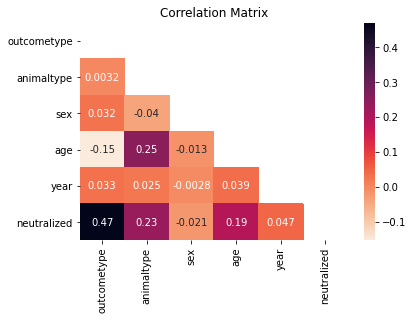

<Figure size 1152x864 with 0 Axes>

In [21]:
data_corr = data_cm[data_cm.columns[0:6]] # excluding binary dummy columns
corr_mat = data_corr.corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
cmap = sns.cm.rocket_r
sns.heatmap(corr_mat, mask = mask, cmap = cmap, annot=True)
plt.title("Correlation Matrix")
plt.figure(figsize=(16, 12))
plt.show()

From the correlation matrix we see that the most prominent predictors are whether or not an animal is neutered, as well as the year and the sex.

## Rare breeds & colors

In [24]:
data_bc = pd.read_csv('data/transformed_data.csv', index_col=0)
data_bc = data_bc.dropna()

In [46]:
breeds_1 = data_bc[data_bc.groupby("Breed").Breed.transform("count") > 5]

In [47]:
adoption_rate_breeds_1 = (breeds_1["OutcomeType"].value_counts()["Adoption"]/breeds_1[breeds_1.columns[0]].count())
adoption_rate_breeds_1

0.4786543170446077

In [48]:
breeds_2 = data_bc[data_bc.groupby("Breed").Breed.transform("count") <= 5]

In [49]:
adoption_rate_breeds_2 = (breeds_2["OutcomeType"].value_counts()["Adoption"]/breeds_2[breeds_2.columns[0]].count())
adoption_rate_breeds_2

0.46261682242990654

In [50]:
colors_1 = data_bc[data_bc.groupby("Color").Color.transform("count") > 3]

In [52]:
adoption_rate_colors_1 = (colors_1["OutcomeType"].value_counts()["Adoption"]/colors_1[colors_1.columns[0]].count())
adoption_rate_colors_1

0.4784623486045287

In [53]:
colors_2 = data_bc[data_bc.groupby("Color").Color.transform("count") <= 3]

In [54]:
adoption_rate_colors_2 = (colors_2["OutcomeType"].value_counts()["Adoption"]/colors_2[colors_2.columns[0]].count())
adoption_rate_colors_2

0.5

In [69]:
index = ("breeds_normal", "breeds_rare", "colors_normal", "colors_rare")
adoption_rates = (adoption_rate_breeds_1, adoption_rate_breeds_2, adoption_rate_colors_1, adoption_rate_colors_2)

df_rarity = pd.DataFrame(
    adoption_rates,
    columns=["adoption_rate"],
    index = index
)

df_rarity.head()

,adoption_rate
breeds_normal,0.478654
breeds_rare,0.462617
colors_normal,0.478462
colors_rare,0.500000


There does not seem to be any significant correlation between rarity of color/breed and a higher adoption rate.